# EDA

El objetivo de este análisis exploratorio de datos (EDA) es examinar un conjunto de datos relacionados a terremotos procedentes de tres fuentes diferentes: Estados Unidos, Chile y Japón. Nuestro objetivo principal es determinar qué columnas son las más adecuadas para construir un modelo de clasificación de terremotos, pero también buscamos identificar columnas compatibles en las tres fuentes para generar una única fuente de datos consolidada.

El conjunto de datos recopila información sobre terremotos registrados en cada uno de estos países, incluyendo datos como magnitud, profundidad, ubicación geográfica, entre otros atributos relevantes. La diversidad de las fuentes nos brinda la oportunidad de examinar diferentes perspectivas y enfoques en el estudio de los terremotos.

Nuestro primer objetivo es llevar a cabo el análisis exploratorio de datos en cada una de las fuentes por separado. Esto implica clasificar las columnas según su tipo de datos y realizar un análisis más detallado para comprender su distribución, medidas de resumen y posibles relaciones con la variable objetivo de clasificación. Este enfoque nos permitirá entender mejor las características y patrones específicos presentes en los terremotos registrados en cada país.

Una vez completado el análisis individual de las fuentes de datos, nuestro segundo objetivo es buscar columnas que sean compatibles en las tres fuentes. Esto implica identificar variables comunes y consistentes entre los conjuntos de datos de Estados Unidos, Chile y Japón. Al encontrar estas columnas compartidas, podremos generar una única fuente de datos consolidada, lo cual facilitará la construcción de un modelo de clasificación robusto y generalizable.

## Librerías a usar:

In [1]:
!pip install wordcloud

import IPython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re

IPython.display.clear_output()

## USA

### Creación del dataframe a analizar:

In [2]:
df = pd.read_csv('src/data/usa_df.csv')

### Comienzo del analisis:

Se comenzará el analisis del dataframe de USA, observando los metadatos del mismo, para proseguir con una analisis más especifico sobre sus columnas.

In [3]:
df.shape

(429325, 22)

El dataframe contiene 22 columnas y 429325 filas.

In [4]:
df.columns


Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

El nombre de las columnas son:

- time
- latitude
- longitude
- depth
- mag
- magType
- ns    
- gap
- dmin
- rms
- net
- id
- updated
- place
- typ
- horizontalError
- depthError
- magError
- magNst
- status
- locationSource
- magSource

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429325 entries, 0 to 429324
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             429325 non-null  object 
 1   latitude         429325 non-null  float64
 2   longitude        429325 non-null  float64
 3   depth            429325 non-null  float64
 4   mag              429325 non-null  float64
 5   magType          429324 non-null  object 
 6   nst              423185 non-null  float64
 7   gap              429289 non-null  float64
 8   dmin             425008 non-null  float64
 9   rms              429232 non-null  float64
 10  net              429325 non-null  object 
 11  id               429325 non-null  object 
 12  updated          429325 non-null  object 
 13  place            428485 non-null  object 
 14  type             429325 non-null  object 
 15  horizontalError  349461 non-null  float64
 16  depthError       429233 non-null  floa

Las columnas del dataframe tienen distintos tipos de datos, por lo que se pueden categorizar las columnas por el tipo de datos que contengan.

Columnas tipo object( columnas que muy probablemente tengan datos del tipo string o de texto ):

- time
- magType
- net
- id
- updated
- place
- type
- status
- locationSource
- magSource

Columnas tipo float( columnas con datos numericos decimales ):

- latitude
- longitude
- depth
- mag
- nst
- gap
- dmin
- rms
- horizontalError
- depthError
- magError
- magNst

Se analizará primero las columnas con datos de tipo string(texto), para continuar posteriormente con las de tipo numerico.

### Columnas de tipo string

Antes de empezar el analisis de cada columna, es necesario entender a qué hace referencia cada columna, y nombrarlas con nombres más faciles de entender. Observemos de forma general el contenido del dataframe en busca de darle un mejor nombre a las columnas por su contenido.

In [6]:
df.select_dtypes(include=['object']).head()

,time,magType,net,id,updated,place,type,status,locationSource,magSource
0,2023-06-29T04:46:02.350Z,md,nc,nc73906566,2023-06-29T05:02:15.178Z,"3km NW of The Geysers, CA",earthquake,automatic,nc,nc
1,2023-06-29T04:45:40.370Z,ml,ci,ci40498704,2023-06-29T04:49:10.599Z,"9km S of Idyllwild, CA",earthquake,automatic,ci,ci
2,2023-06-29T04:23:14.270Z,md,nc,nc73906556,2023-06-29T04:39:17.028Z,"7km NW of The Geysers, CA",earthquake,automatic,nc,nc
3,2023-06-29T03:57:40.330Z,ml,ci,ci40498656,2023-06-29T04:08:55.110Z,"2km ESE of Redlands, CA",earthquake,automatic,ci,ci
4,2023-06-29T03:26:25.154Z,ml,ok,ok2023mphw,2023-06-29T03:29:05.456Z,"10 km WNW of Kingfisher, Oklahoma",earthquake,automatic,ok,ok


- La columna time, hace referencia a la fecha con su respectiva hora en la que se tomó la medida del evento, se cambiará su nombre a "fecha". Como esta columna contiene fechas, se cambiara su tipo de dato de "object" a "date_time" para mejorar el analisis

- La columna magType, hace referencia al tipo de magnitud registrada, la clasificación de las mismas se puede encontrar en este --> [link](https://www.usgs.gov/programs/earthquake-hazards/magnitude-types) <--, se cambiará su nombre a "tipo_magnitud"
- La columna net, hace referencia a la "Network" o red sismologica que detecto el evento, si se desea saber más sobre a qué hace referencia cada codigo revisar esta --> [página](http://www.fdsn.org/networks/?search=nc) <--, se cambiará su nombre a "red_sismologica"
- La columna id, hace referencia a la identificación del evento sucedido, se cambiará su nombre a "identificacion"
- La columna updated, hace referencia a la fecha y a su respectiva hora en la que se modificó la medida del evento, se cambiará su nombre a "fecha_modificacion". Al igual que la columna fecha, el tipo de dato de esta columna debe cambiarse para ser tomada como una fecha y no un texto
- La columna place, hace referencia al lugar donde sucedió el evento, se cambiará su nombre a "lugar_evento"
- La columna type, hace referencia al tipo de evento que se documentó, en este caso tan particular, todos los eventos son del tipo "earthquake", por lo que se puede borrar esta columna sin afectar la integridad del dataframe, primero confirmemos esto antes de eliminarla, se cambiará su nombre a "tipo_evento"
- La columna status, hace referencia al estado o estado de procesamiento de un evento sísmico. Proporciona información sobre la etapa en la que se encuentra el evento sísmico en el proceso de recopilación, análisis y reporte de datos, recibirá el nombre de "estado_evento"
- La columna  locationSource, hace referencia a la fuente o el método utilizado para determinar la ubicación de un evento sísmico registrado. Sus valores son similares a los de la columna red_sismologica. Se cambiará su nombre a "fuente_localizacion"
- La columna magSource, hace referencia a la fuente o la agencia responsable de calcular la magnitud de un evento sísmico. Sus valores son similares a los de la columna red_sismologica y fuente_localizacion. Se cambiará su nombre a "fuente_magnitud"


In [7]:
# cambio de nombre de las columnas
nuevos_nombres = {'time' : 'fecha',
'magType': 'tipo_magnitud',
'net': 'red_sismologica',
'id': 'identificacion',
'updated': 'fecha_modificacion',
'place':'lugar_evento',
'type':'tipo_evento',
'status':'estado_evento',
'locationSource':'fuente_localizacion',
'magSource':'fuente_magnitud'}
df.rename(columns = nuevos_nombres, inplace=True)

# cambio de tipo de dato de las columnas fecha y fecha_modificacion
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha_modificacion'] = pd.to_datetime(df['fecha_modificacion'])



#### Columna fecha

Teniendo las fechas, podemos comenzar el análisis revisando desde cuando están disponibles los datos:

In [8]:
df.fecha.head(1)

0   2023-06-29 04:46:02.350000+00:00
Name: fecha, dtype: datetime64[ns, UTC]

In [9]:
df.fecha.tail(1)

429324   2018-01-01 00:01:50.770000+00:00
Name: fecha, dtype: datetime64[ns, UTC]

Tenemos un rango de datos desde el 29 de junio del 2023, hasta el 1 de enero de 2018. 5 años de datos para analizar. Observemos de los datos disponible, que año tiene la mayor cantidad de terremotos:

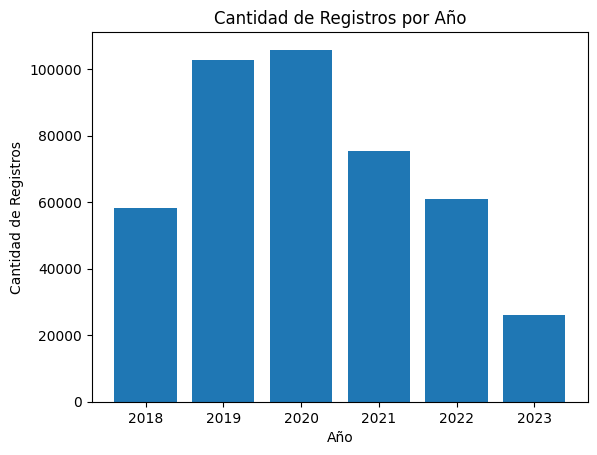

In [10]:
conteo = df['fecha'].dt.year.value_counts()
plt.bar(conteo.index, conteo.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Año')
plt.show()

Se puede observar que el año con mayor eventos registrados es el 2020, seguido por el 2019, con esto presente, se puede optar por tomar estos años como referente para la creación del modelo de clasificación de terremotos. Miremos la cantidad de terremotos por meses

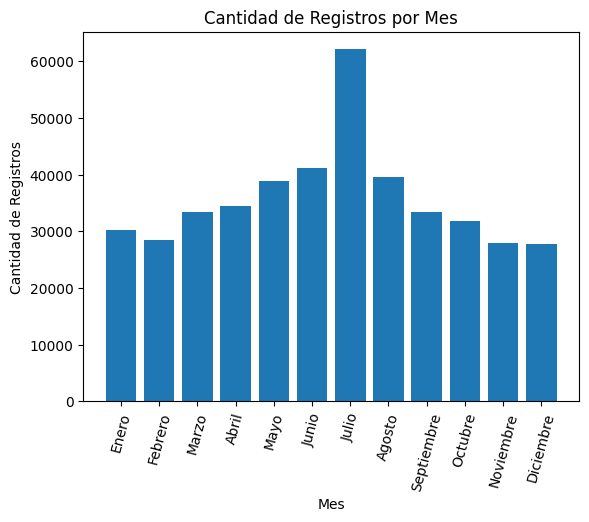

In [11]:
conteo = df['fecha'].dt.month.value_counts()
plt.bar(conteo.index, conteo.values)
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.xticks(conteo.index.sort_values(),labels=nombres_meses,rotation = 75)
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Mes')
plt.show()

El mes con mayor cantidad de terremotos históricamente fue julio. Con estos dos datos, podemos enfocar el modelado con respecto a la época del año o del año mismo. Ahora, observemos las columnas de tipo string.

In [12]:
df.describe(include = "O")

,tipo_magnitud,red_sismologica,identificacion,lugar_evento,tipo_evento,estado_evento,fuente_localizacion,fuente_magnitud
count,429324,429325,429325,428485,429325,429325,429325,429325
unique,12,14,429325,51394,1,2,16,17
top,ml,ci,nc73423716,"7km NW of The Geysers, CA",earthquake,reviewed,ci,ci
freq,289805,162890,1,6965,429325,332808,162893,162898


En esta tabla podemos extraer información valiosa para nuestro análisis pues podemos ver si hay datos nulos, el dato de mayor frecuencia, y la cantidad de datos únicos por columna, revisaremos cada columna detenidamente

#### Columna tipo_magnitud

De esta columna podemos observa que: 

- De 429325, tiene 429324, hace falta un dato, el cual corresponde a:

In [13]:
df[df.tipo_magnitud.isna()]

,fecha,latitude,longitude,depth,mag,tipo_magnitud,nst,gap,dmin,rms,...,fecha_modificacion,lugar_evento,tipo_evento,horizontalError,depthError,magError,magNst,estado_evento,fuente_localizacion,fuente_magnitud
245265,2020-04-11 18:02:20.750000+00:00,38.056833,-118.728,6.44,3.2,NaN,36.0,98.0,0.262,0.05,...,2021-02-19 19:20:19.932000+00:00,"30km SE of Bodie, CA",earthquake,0.32,2.7,NaN,NaN,reviewed,nc,nc


Se puede ver como la consulta tiene no solo la columna tipo_magnitud con un valor NAN o nulo, sino también hay otras con estos valores, por lo que se podría considerar un error y se puede considerar su eliminación del dataframe.

- La columna tiene 12 valores unicos, de los que el valor "ml" es el de mayor frecuencia:

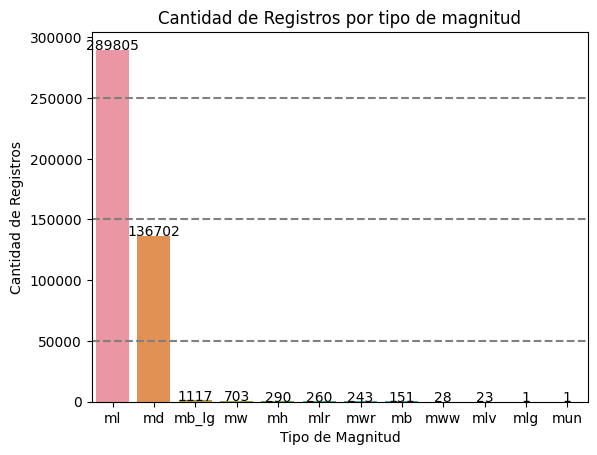

In [14]:
conteo = df['tipo_magnitud'].value_counts()
sns.barplot(x=conteo.index, y=conteo.values)
# Agregar líneas guías horizontales en las posiciones deseadas
posiciones_guias = [50000, 150000, 250000]  # Lista de posiciones de las líneas guías
for posicion in posiciones_guias:
    plt.axhline(y=posicion, color='gray', linestyle='--')
# Agregar los valores encima de cada barra
for i, v in enumerate(conteo.values):
    plt.text(i, v + 0.5, str(v), ha='center')
# Personalizar los ejes y el título
plt.xlabel('Tipo de Magnitud')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por tipo de magnitud')
# Mostrar el gráfico
plt.show()

Aparte de del dato 'ml', el siguiente dato con mayor frecuencia es 'md' de resto, la frecuencia de datos es mínima, y muy pequeña a comparación de los dos datos más grandes

### Significado Magnitudes

##### ML:Magnitud de onda local (Local Magnitude).
También conocida como magnitud de Richter, es una medida de la amplitud de las ondas sísmicas registradas en sismógrafos cercanos al epicentro. Se utiliza principalmente para sismos de menor magnitud y en distancias cortas.

##### MD: Magnitud de duración (Duration Magnitude).
 Es una medida de la energía liberada por un terremoto basada en la duración total de las ondas sísmicas registradas. Se utiliza en terremotos de magnitud moderada a grande.

##### MB-LG: Magnitud de onda corporal y superficie (Body and Surface Wave Magnitude). 
Es una medida de la energía liberada por un terremoto basada en la amplitud de las ondas sísmicas registradas tanto en ondas corporales como en ondas superficiales. Esta magnitud se utiliza para terremotos de magnitud moderada a grande.

##### MW: Magnitud de momento (Moment Magnitude).
Es una medida de la energía total liberada por un terremoto, que se calcula a partir del desplazamiento relativo a lo largo de la falla sísmica y el área de la superficie de la falla. Se considera una medida más precisa y confiable para terremotos de magnitud grande.

##### MH: Magnitud de Hudson (Hudson Magnitude).
Es una medida de la amplitud de las ondas sísmicas registradas en sismógrafos específicos utilizados por la red sísmica del Observatorio Lamont-Doherty de la Universidad de Columbia.

##### MLR: Magnitud de onda local revisada (Revised Local Magnitude).
Es una versión revisada de la magnitud de onda local (ML) que toma en cuenta correcciones y ajustes adicionales en los cálculos.

##### MWR: Magnitud de momento revisada (Revised Moment Magnitude).
Es una versión revisada de la magnitud de momento (MW) que incorpora correcciones y ajustes adicionales.

##### MB: Magnitud de duración revisada (Revised Duration Magnitude).
Es una versión revisada de la magnitud de duración (MD) que toma en cuenta correcciones y ajustes adicionales.

##### MWW: Magnitud de momento en banda ancha (Moment Magnitude from Broadband).
Es una versión de la magnitud de momento (MW) calculada a partir de registros de banda ancha de ondas sísmicas.

##### MLV: Magnitud de onda local vertical (Vertical Local Magnitude).
Es una medida de la amplitud de las ondas sísmicas registradas en sismógrafos verticales cercanos al epicentro.

##### MLG: Magnitud de onda local horizontal (Horizontal Local Magnitude).
Es una medida de la amplitud de las ondas sísmicas registradas en sismógrafos horizontales cercanos al epicentro.

##### MUN: Magnitud de onda uniforme (Uniform Magnitude).
Es una magnitud que se calcula utilizando un método uniforme para todos los terremotos registrados en una red sísmica específica.

#### columna red_sismologica

Se puede observar de esta columna:

- No tiene datos nulos
- Su dato de mayor frecuencia es 'ci', con una frencuencia de 162890

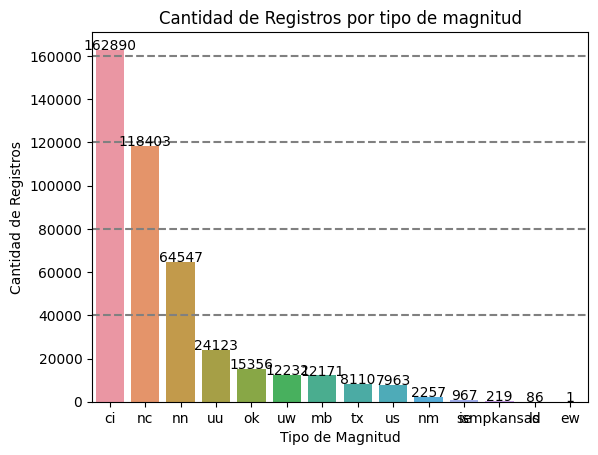

In [15]:
conteo = df['red_sismologica'].value_counts()
sns.barplot(x=conteo.index, y=conteo.values)
# Agregar líneas guías horizontales en las posiciones deseadas
posiciones_guias = [40000, 80000, 120000, 160000]  # Lista de posiciones de las líneas guías
for posicion in posiciones_guias:
    plt.axhline(y=posicion, color='gray', linestyle='--')
# Agregar los valores encima de cada barra
for i, v in enumerate(conteo.values):
    plt.text(i, v + 0.5, str(v), ha='center')
# Personalizar los ejes y el título
plt.xlabel('Tipo de Magnitud')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por tipo de magnitud')
# Mostrar el gráfico
plt.show()

#### Columna identificacion

Esta columna contiene la identificación de cada terremoto, no tiene nulos, y todos los datos son únicos, por lo que se puede obviar esta columna del análisis, se recomienda eliminar la columna por su nulo uso para la realización del modelo

#### Columna lugar_evento

De esta columna podemos observar que:

- Hay datos nulos en esta columna


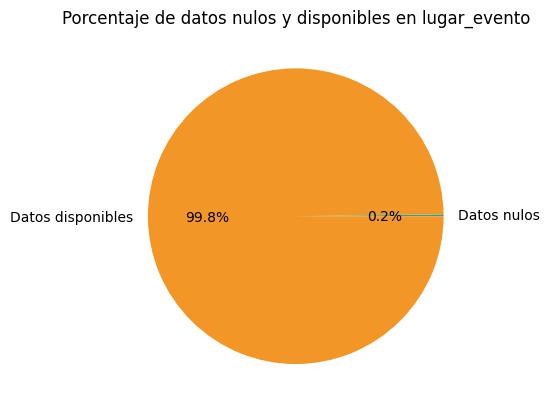

In [16]:
Cantidad_nulos = df[df.lugar_evento.isna()].shape[0]
Cantidad_disponibles = df[~df.lugar_evento.isna()].shape[0]
valores = [Cantidad_nulos,Cantidad_disponibles ]
titulos = ['Datos nulos', 'Datos disponibles']
colores = ['#22A699' ,'#F29727']

plt.pie(valores, labels=titulos, colors=colores, autopct='%1.1f%%')
plt.title('Porcentaje de datos nulos y disponibles en lugar_evento')

plt.show()

Pero al ser una ínfima cantidad de todos los datos, podríamos pasarlo por alto. No debería perjudicar el usar esta categoría al hacer un modelo

- Hay una gran cantidad de datos unicos, hagamos una nube de palabras para ver que palabras son las más comunes.

In [17]:
#dejar solo el pais o lugar en el "lugar evento"
df['lugar_evento'] = df['lugar_evento'].str.extract(r'(?:[^,]*,)*([^,]*)$')

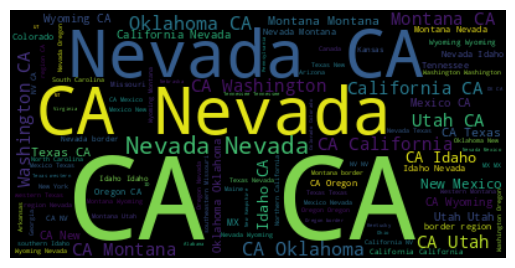

In [18]:
# Extraer los valores de la columna deseada en forma de texto
texto = ' '.join(df['lugar_evento'].dropna().astype(str).tolist())

# Tokenizar el texto en palabras individuales
tokens = word_tokenize(texto)

# Eliminar las stopwords del texto tokenizado
stop_words = set(stopwords.words(['english']))  # Cambia 'english' al idioma de tu elección
tokens = [word for word in tokens if word.lower() not in stop_words]

# Unir los tokens nuevamente en un solo texto
filtered_text = ' '.join(tokens)

# Crear la nube de palabras
wordcloud = WordCloud().generate(filtered_text)

# Visualizar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Se puede observar como las palabras más relevantes son: Nevada ( lo que implica que esta locación suele tener muchos terremotos o al menos en el histórico), CA ( diminutivo de california, otra localidad que aparece mucho en los registros), Utah, Montana, Oklahoma . La columna lugar_evento nos puede ser muy útil para definir la zona de donde se captó el terremoto, pero en cuestiones de ayudarnos en la creación de un modelo que nos ayude a clasificar los terremotos, no sería de gran ayuda. Se recomienda eliminar esta columna.

#### Columna tipo_evento

Esta columna se puede obviar completamente en este caso, solo contiene un dato (repetido varias veces) que sería "eartquake" o terremoto en español 

#### Columna estado_evento

Podemos observar de esta columna:

- No tiene valores nulos
- Solo tiene 2 posibles valores: automatic, reviewed; estos hacen referencia a la manera de como fueron registrado los terremotos, veamos su porcentaje en el dataframe:

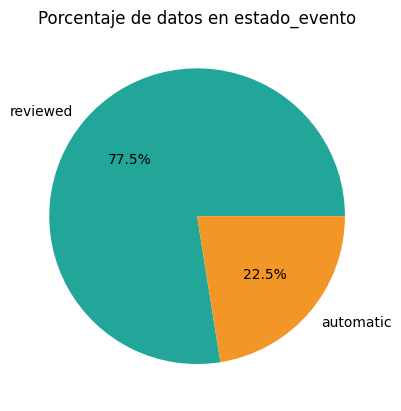

In [19]:
cantidad_valores = df.estado_evento.value_counts()
valores = [ cantidad_valores.values[0] ,cantidad_valores.values[1] ]
titulos = [cantidad_valores.index[0], cantidad_valores.index[1]]
colores = ['#22A699' ,'#F29727']

plt.pie(valores, labels=titulos, colors=colores, autopct='%1.1f%%')
plt.title('Porcentaje de datos en estado_evento')

plt.show()

Se puede ver como la mayoría de datos fueron revisados por encargados ya que hay más datos "reviewed" que "automatic". Esta columna puede ser borrada, si no se necesita filtrar la información por como se obtuvo.

#### Columnas fuente_localizacion y fuente_magnitud

Se ha decidido analizar ambas columnas por igual, por la igualdad de datos. De antemano, se debe entender que ambas columnas almacenan el código del centro ( al igual que la columna red_sismologica ), en una vista previa de los datos, se veía que ambas columnas tenían datos repetidos. Observemos las características de ambas columnas:

- Ambas columnas no tienen datos nulos
- La diferencia es que fuente_localizacion tiene 16 datos unicos, mientras fuente_magnitud 17. Al haber un dato de más, se puede descartar la idea de que sean iguales.

Estas dos columnas pueden servirnos para filtrar datos, pero al momento de usarla en un modelo, poco podría servirnos por su correlación de datos, se recomienda obviar ambas columnas.

In [20]:
df.fuente_localizacion.unique()

array(['nc', 'ci', 'ok', 'nn', 'uw', 'uu', 'tx', 'us', 'mb', 'nm', 'se',
       'ew', 'ld', 'ismp', 'ott', 'tul'], dtype=object)

In [21]:
df.fuente_magnitud.unique()

array(['nc', 'ci', 'ok', 'nn', 'uw', 'uu', 'tx', 'us', 'mb', 'nm', 'se',
       'ott', 'slm', 'ew', 'ld', 'ismp', 'tul'], dtype=object)

El único dato de más, en la columna fuente_magnitud es 'slm'

In [26]:
conteo = df['fuente_localizacion'].value_counts()
conteo

ci      162893
nc      118403
nn       64547
uu       24123
ok       15531
uw       12234
mb       12171
tx        8110
us        7230
nm        2257
se         967
tul        492
ismp       257
ld          86
ott         23
ew           1
Name: fuente_localizacion, dtype: int64

**CI:** Red Sísmica de California (California Integrated Seismic Network)
**NC:** Red Sísmica de Carolina del Norte (North Carolina Seismic Network)
**NN:** Red Nacional de Sismología de Canadá (National Seismograph Network)
**UU:** Red Sísmica de Utah (University of Utah Seismograph Stations)
**OK:** Red Sísmica de Oklahoma (Oklahoma Geological Survey)
**UW:** Red Sísmica de Washington (Pacific Northwest Seismic Network)
**MB:** Red Sísmica de Manitoba, Canadá (Manitoba Seismic Network)
**TX:** Red Sísmica de Texas (TexNet Seismic Monitoring Program)
**US:** Red Sísmica de los Estados Unidos (United States Geological Survey)
**NM:** Red Sísmica de Nuevo México (New Mexico Tech Seismic Network)
**SE:** Red Sísmica del Sureste de los Estados Unidos (Southeast U.S. Seismic Network)
**TUL:** Red Sísmica de la Universidad de Tulsa (University of Tulsa Seismic Network)
**ISMP:** Red Sísmica Internacional (International Seismological Centre)
**LD:** Red Sísmica de Londres (London Seismic Network)
**OTT:** Red Sísmica de Ottawa (Ottawa-Gatineau Seismic Monitoring Centre)
**EW:** Red Sísmica del Oeste de los Estados Unidos (Earthquake Hazards Program Western Region)

### Columnas tipo float

Esta son las columnas con datos numéricos decimales, al igual que en el análisis de las columnas tipo string, antes de comenzar es bueno entender a qué hace referencia cada columna y darles un nombre más intuitivo. Observemos de forma general el contenido del dataframe en busca de darle un mejor nombre a las columnas por su contenido.

In [22]:
df.select_dtypes(include=['float']).head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,38.796166,-122.781166,3.830000,0.28,6.0,145.000000,0.006061,0.010000,1.120000,3.040000,0.040,8.0
1,33.659167,-116.732167,12.400000,0.39,17.0,54.000000,0.053990,0.110000,0.240000,0.380000,0.133,11.0
2,38.824165,-122.804001,2.470000,0.20,8.0,81.000000,0.017540,0.030000,0.480000,1.390000,0.080,8.0
3,34.048667,-117.166333,10.610000,1.34,47.0,60.000000,0.046670,0.180000,0.230000,0.420000,0.234,25.0
4,35.881329,-98.047607,7.989354,1.77,10.0,86.452896,0.087374,0.488169,4.835118,6.372441,0.290,4.0


- La columna latitude y longitude, almacenan las coordenadas geograficas donde se registró el terremoto. Si necesitas saber más de latitud y longitud de las coordenadas geograficas, presiona -->[Aqui](https://es.wikipedia.org/wiki/Coordenadas_geogr%C3%A1ficas)<--. Por facilidad linguistica, se cambiara el nombre a las columnas por: "latitud" y "longitud"
- La columna depth, se refiere a la profundidad del evento sísmico registrado. Su valor expresa la distancia en kilometros, se cambiará su nombre a "profundidad"
- La columna mag, se refiere a la magnitud del evento sísmico registrado. La magnitud es una medida numérica que representa la energía liberada por un evento sísmico y se utiliza para describir su tamaño o intensidad. Si se desea saber más sobre la magnitud de un evento sismico, haz click --> [aquí](https://es.wikipedia.org/wiki/Escala_sismol%C3%B3gica_de_Richter) <--. Se cambiará su nombre a "magnitud"
- La columna nst se refiere al número de estaciones que contribuyeron a la determinación de la magnitud de un evento sísmico. "nst" significa "number of stations" en inglés, que se traduce como "número de estaciones" en español. Se cambiará su nombre a "numero_estaciones"
- La columna gap, se refiere al ángulo de brecha (gap angle, en inglés) en el contexto de la ubicación de las estaciones sísmicas. El ángulo de brecha se utiliza para medir la cobertura angular de las estaciones sísmicas en relación con un evento sísmico específico.Un valor de gap cercano a cero indica una buena cobertura angular, lo que significa que las estaciones sísmicas están bien distribuidas alrededor del evento y proporcionan una visión completa de la actividad sísmica en esa área. Por otro lado, un valor de gap cercano a 180 o más indica una cobertura deficiente, lo que significa que hay una brecha significativa en la cobertura de las estaciones alrededor del evento. Se cambiará su nombre por "angulo_brecha"
- La columna dmin, se refiere a la distancia mínima (en inglés, "minimum distance") entre una estación sísmica y el epicentro de un evento sísmico registrado. El valor numérico en la columna "dmin" indica la distancia más corta en kilómetros entre una estación sísmica específica y la ubicación estimada del epicentro del evento. Se cambiará su nombre por "distancia_minima"
- La columna rms, se refiere al error cuadrático medio (Root Mean Square, RMS en inglés) de las lecturas sísmicas. El valor numérico en la columna "rms" representa la medida del error promedio entre las lecturas observadas y las lecturas esperadas de las estaciones sísmicas involucradas en la detección y registro del evento sísmico. Su nombre se cambiará por "error_cuadrático"
- La columa horizontalError, se refiere al error horizontal estimado asociado con la ubicación del epicentro de un evento sísmico registrado. Indica la incertidumbre en la determinación de la ubicación horizontal del evento sísmico. Su nombre se cambiará "error_horizontal"
- La columna depthError, se refiere al error estimado asociado con la profundidad del evento sísmico registrado. Indica la incertidumbre en la determinación de la ubicación vertical del evento. Su nombre se cambiará "error_profundidad"
- La columna magError, se refiere al error estimado asociado con la magnitud del evento sísmico registrado. Indica la incertidumbre en la determinación de la magnitud del evento. Su nombre se cambiará por "error_magnitud"
- La columna magNst, se refiere al número de estaciones que contribuyeron al cálculo de la magnitud de un evento sísmico. "magNst" es una abreviatura de "Magnitude Station Count" en inglés, que se traduce como "Cantidad de Estaciones de Magnitud" en español. Su nombre se cambiará por "cantidad_estaciones_magnitud"

In [27]:
nuevos_nombres = {
    'latitude': 'latitud',
    'longitude': 'longitud',
    'depth': 'profundidad',
    'mag':'magnitud',
    'nst':'numero_estaciones',
    'gap':'angulo_brecha',
    'dmin':'distancia_minima',
    'rms':'error_cuadrático',
    'horizontalError':'error_horizontel',
    'depthError':'error_profundidad',
    'magError':'error_magnitud',
    'magNst':'cantidad_estaciones_magnitud'
}
df.rename(columns = nuevos_nombres, inplace=True)

Con los nuevos nombres listos, podemos comenzar con el análisis de las variables cuantitativas. Observemos una descripción general de los datos en conjunto a una matriz de correlación

In [28]:
df.describe()

,latitud,longitud,profundidad,magnitud,numero_estaciones,angulo_brecha,distancia_minima,error_cuadrático,error_horizontel,error_profundidad,error_magnitud,cantidad_estaciones_magnitud
count,429325.000000,429325.000000,429325.000000,429325.000000,423185.000000,429289.000000,425008.000000,429232.000000,349461.000000,429233.000000,392201.000000,410596.000000
mean,37.374776,-116.830801,6.289726,1.144406,20.555043,102.352495,0.081391,0.133898,0.464605,1.863667,0.188239,12.700509
std,3.373114,6.325400,4.743194,0.664789,15.660134,54.041104,0.124035,0.128496,0.621727,11.414633,0.128042,15.706565
min,24.751800,-124.999333,-3.500000,0.000000,0.000000,7.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000
25%,35.619335,-119.935900,2.610000,0.670000,10.000000,64.000000,0.020340,0.060000,0.220000,0.440000,0.115000,4.000000
50%,37.299900,-117.707667,5.640000,1.040000,16.000000,89.000000,0.048260,0.127300,0.310000,0.680000,0.164000,9.000000
75%,38.812168,-116.504333,8.820000,1.510000,25.000000,128.000000,0.089960,0.180000,0.490000,1.210000,0.228000,16.000000
max,49.969900,-65.068200,93.410000,7.100000,289.000000,360.000000,6.219000,46.240000,99.000000,4247.400000,2.820000,345.000000


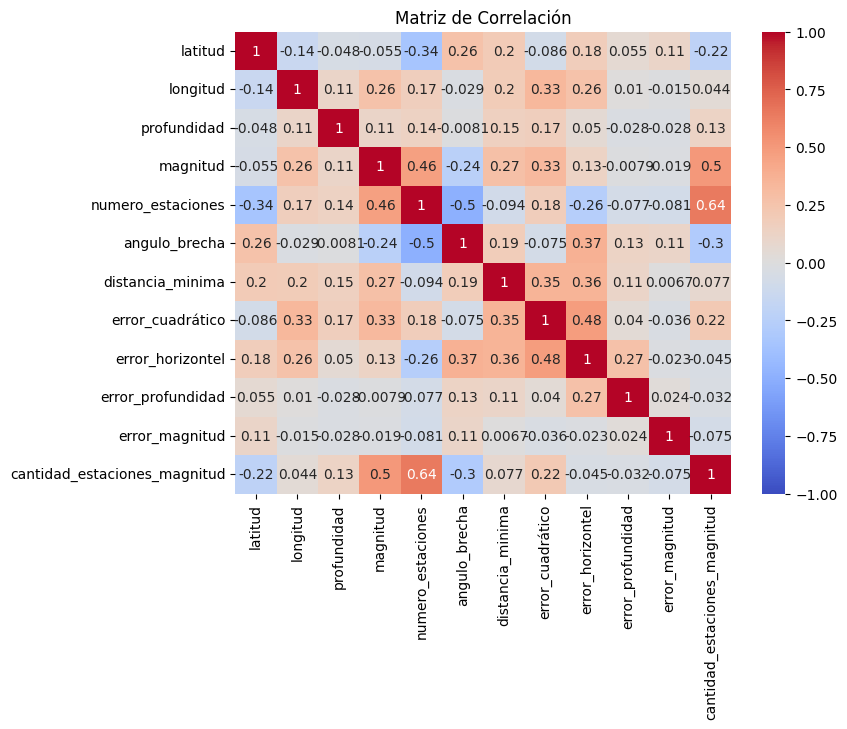

In [32]:
# Visualizar la matriz de correlación
columnas_seleccionadas = df.select_dtypes(include=['float']).columns.tolist()
columnas_data = df[columnas_seleccionadas]

# Calcular la matriz de correlación
correlation_matrix = columnas_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Gracias a la matriz de la correlación, se puede ver que la mayoría de variables (columnas) son independientes entre ellas, habiendo solo algunas de ellas con un mínimo de correlación que revisaremos dependiendo del caso

#### Columna latitud y longitud

Ambas columnas son numéricas como se había descrito anteriormente, pero estas no deben ser procesadas como meros números. Cada columna trata de una dirección un acontecimiento, operar estos valores no nos traerá nada significativo, no obstante, se pueden sacar algunas conclusiones de los percentiles:

- En general, son valores cercanos entre ellos y a los valores mínimos y máximos, numéricamente implica una distribución normal sin outliers o datos atípicos, pero en el contexto de las variables, implica que las localizaciones a las que hace referencia son "cercanas" entre ellas. Algo muy obvio si se considera que el dataframe trata de terremotos de Estados Unidos. 

Se recomienda utilizar estos valores para filtrar los datos de un modelo, o en caso de utilizar otros campos, se pueden eliminar.

#### Columna profundidad

Podemos observa de esta columna que:

- No hay datos nulos

- El valor mínimo es -3.5, lo que podría considerarse un outlier o error pues las profundidades deberían ser valores negativos, observemos si hay más datos como este:

In [34]:
df[df.profundidad< 0 ].shape[0]

9907

Hay 9907 datos, donde la profundidad es menor a 0. Según la USGS (Servicio Geológico de los Estados Unidos) no es común que se reporten profundidades negativas en el contexto de los eventos sísmicos. La profundidad generalmente se mide en relación con la superficie de la Tierra, y una profundidad negativa indicaría que el evento sísmico ocurrió por debajo de la superficie del suelo o el nivel del mar. Sin embargo, es importante tener en cuenta que en algunos casos particulares o en ciertos contextos geológicos específicos, como en regiones con cuencas sedimentarias o zonas de hundimiento, es posible encontrar informes de eventos sísmicos con profundidades negativas. Esto puede ocurrir cuando los movimientos tectónicos o los procesos geológicos han causado un hundimiento de la corteza terrestre en relación con un punto de referencia de referencia. De manera que se pueden descartar estos datos como errores y ser tomados como datos atípicos. Observemos la distribución de estos datos con un histograma y un diagrama de velas.

Text(0.5, 1.0, 'Diagrama de Caja')

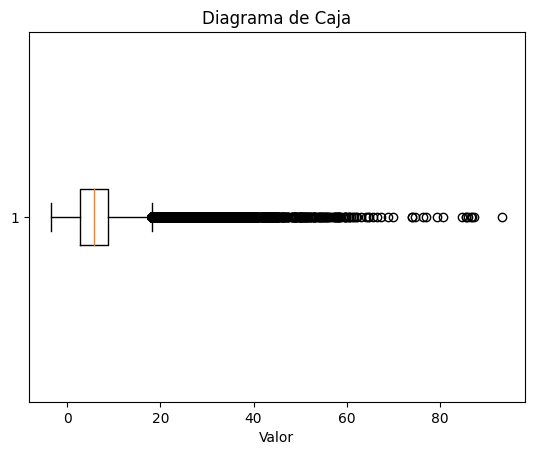

In [36]:
plt.boxplot(df.profundidad, vert=False)

# Configuración adicional
plt.xlabel('Valor')
plt.title('Diagrama de Caja')

Podemos ver varios puntos negros hacia la derecha, estos muestran todos los valores que están más del percentil del 75%, valores muy altos para la distribución de los datos.

#### Columna magnitud

<function matplotlib.pyplot.show(close=None, block=None)>

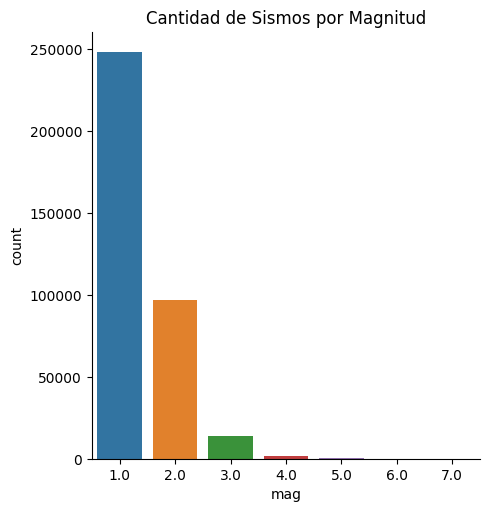

In [25]:
#Sismos por Magnitud
#Copia y redondeo de magnitud

df_copia = df.copy()
df_copia['mag'] = df_copia['mag'].round()
df_copia = df_copia[df_copia['mag'] > 0]

sns.catplot(
    data=df_copia,
    x='mag',
    kind='count',
)
plt.title('Cantidad de Sismos por Magnitud')
plt.show

#### Columna numero_estaciones

#### Columna angulo_brecha

#### Columna distancia_minima

#### Columna error_cuadratico

#### Columna error_horizontal

#### Columna error_profundidad

#### Columna error_magnitud

#### Columna cantidad_estaciones_magnitud

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=db6802ae-5366-42d7-989b-ff60aa4b4014' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>